<a href="https://colab.research.google.com/github/unVeroz007/DIF62130_KELAS-B_25_2311532008/blob/main/Praktikum1/LinearRegressiion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Digunakan untuk mengolah data dalam bentuk tabel (DataFrame).
import numpy as np #Digunakan untuk mengolah array dan operasi matematika dengan performa tinggi
import matplotlib.pyplot as plt #Digunakan untuk membuat grafik dan visualisasi data.
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures #Mengimpor Modul dari sklearn untuk Machine Learning "MinMaxScaler" Digunakan untuk menstandarisasi data dengan mengubah nilai fitur ke rentang 0 hingga 1. "PolynomialFeatures" Digunakan untuk mengubah fitur linear menjadi fitur polinomial (contoh: menambahkan X², X³).
from sklearn.model_selection import train_test_split # Digunakan untuk membagi dataset menjadi data latih dan data uji.
from sklearn.linear_model import LinearRegression #Model Regresi Linear, yang digunakan untuk menganalisis hubungan antara variabel input (X) dan output (y).
from sklearn.metrics import mean_squared_error #Digunakan untuk mengukur kesalahan prediksi model.
from sklearn.datasets import fetch_california_housing #Mengimpor Dataset California Housing "fetch_california_housing" Mengambil dataset harga rumah di California, yang digunakan untuk latihan prediksi harga rumah berdasarkan fitur seperti luas, jumlah kamar, dll.


In [ ]:
from sklearn.datasets import fetch_california_housing #Mengambil dataset harga rumah di California, yang sudah tersedia di sklearn.
housing = fetch_california_housing() #housing → Menyimpan data yang berisi fitur-fitur rumah dan harga median rumah.
df = pd.DataFrame(housing.data, columns=housing.feature_names) #"pd.DataFrame()"" Mengubah data dari bentuk array menjadi tabel (DataFrame Pandas). "pd.DataFrame()" Mengubah data dari bentuk array menjadi tabel (DataFrame Pandas). "columns=housing.feature_names" Memberikan nama kolom sesuai fitur yang tersedia dalam dataset.
df['MedHouseValue'] = pd.Series(housing.target) #"df['MedHouseValue']" Menambahkan kolom baru bernama "MedHouseValue" yang berisi harga rumah. "housing.target" Berisi harga median rumah (y/output).

targets=df['MedHouseValue'] #dependent variabel, "targets" Variabel y (dependent) yang berisi harga rumah (MedHouseValue).
inputs=df.drop('MedHouseValue', axis=1) #independent variabel, "inputs" Variabel X (independent) yang berisi semua fitur kecuali harga rumah.
df.head() #menampilkan 5 data teratas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.describe() #df.describe() → Menampilkan statistik ringkasan dari setiap kolom numerik dalam DataFrame.
#df.info(), Menampilkan informasi umum tentang DataFrame, termasuk:

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=1)
print(X_train.shape,X_test.shape) # Untuk melatih model.
print(y_train.shape,y_test.shape) #Untuk mengukur akurasi model setelah dilatih

#Memisahkan dataset menjadi data latih (training set) dan data uji (test set).
#inputs (X) untuk Fitur rumah yang digunakan sebagai input model.
#targets (y) untuk Harga rumah yang menjadi output (label) yang ingin diprediksi.
#test_size=0.3 untuk 30% dari data digunakan sebagai data uji, sedangkan 70% digunakan sebagai data latih.
#random_state=1 Agar pemisahan data konsisten setiap kali dijalankan (hasil tidak berubah).
#X_train.shape untuk Menampilkan jumlah baris dan kolom pada data latih (fitur X).
#X_test.shape untuk Menampilkan jumlah baris dan kolom pada data uji (fitur X).
#y_train.shape untuk Menampilkan jumlah data target (harga rumah) untuk data latih.
#y_test.shape untuk Menampilkan jumlah data target (harga rumah) untuk data uji.

(14448, 8) (6192, 8)
(14448,) (6192,)


In [ ]:
scaler = MinMaxScaler() #1️⃣ Normalisasi Data dengan MinMaxScaler, MinMaxScaler() Digunakan untuk menskalakan (menormalkan) data agar semua fitur berada dalam rentang 0 hingga 1.
X_train = scaler.fit_transform(X_train) #Melatih MinMaxScaler dan Transformasi Data Latih, "fit()"  Menghitung nilai minimum dan maksimum dari X_train. "transform()" Mengubah setiap nilai dalam X_train ke dalam rentang 0 - 1 berdasarkan rumus:
X_test = scaler.transform(X_test) # "transform(X_test)" Menggunakan nilai min dan max yang dihitung dari X_train untuk menormalkan X_test.
print(X_test) #menampilkan X_test dalam bentuk array, di mana semua nilai sekarang berada dalam rentang 0 hingga 1.

[[1.89659453e-01 7.45098039e-01 2.59249620e-02 ... 8.26699958e-04
  1.61530287e-01 5.94594595e-01]
 [1.01964111e-01 7.05882353e-01 2.93658328e-02 ... 1.49655077e-03
  4.50584485e-01 4.52452452e-01]
 [2.42293210e-01 8.82352941e-01 2.57625553e-02 ... 2.43712035e-03
  5.51540914e-01 1.88188188e-01]
 ...
 [1.43901463e-01 9.01960784e-01 2.71911561e-02 ... 1.63065424e-03
  5.92986185e-01 2.05205205e-01]
 [1.45508338e-01 2.35294118e-01 2.97484189e-02 ... 1.59782455e-03
  5.87672689e-01 2.06206206e-01]
 [8.33367816e-02 5.49019608e-01 1.45501245e-02 ... 1.74904890e-03
  1.65781084e-01 6.00600601e-01]]


In [ ]:
lr_model = LinearRegression() #"LinearRegression()" Membuat model Regresi Linear dari Scikit-Learn. digunakan untuk memprediksi hubungan antara variabel input (X) dan output (y)
lr_model.fit(X_train, y_train) #"fit(X_train, y_train)" untuk Melatih model Regresi Linear menggunakan data latih (X_train, y_train).

LinearRegression()

In [ ]:
print(f'intercept : {lr_model.intercept_}') #"lr_model.intercept_" Menampilkan nilai intercept (b) dalam persamaan regresi linear
print(f'slope : {lr_model.coef_}') #"lr_model.coef_" Menampilkan nilai koefisien (slope/m) untuk setiap fitur dalam X_train

intercept : 3.7215161325064994
slope : [  6.39513914   0.49408893 -14.78075919  20.98391128  -0.2003207
  -4.08551937  -3.98214561  -4.37460957]


In [ ]:
y_pred = lr_model.predict(X_test) #"lr_model.predict(X_test)" Menggunakan model Regresi Linear yang telah dilatih untuk memprediksi harga rumah (y_pred) berdasarkan data uji (X_test).
mse = mean_squared_error(y_test, y_pred) #"mean_squared_error(y_test, y_pred)" Mengukur seberapa jauh hasil prediksi (y_pred) dari nilai sebenarnya (y_test).
r2 = lr_model.score(X_test, y_test) #"lr_model.score(X_test, y_test)" Menghitung koefisien determinasi (R²).

print(f'MSE : {mse}') #Menampilkan nilai MSE, Seberapa besar error prediksi.
print(f'R2 : {r2}') #Menampilkan nilai R², Seberapa baik model menjelaskan data.

MSE : 0.5296293151408232
R2 : 0.597142973735963


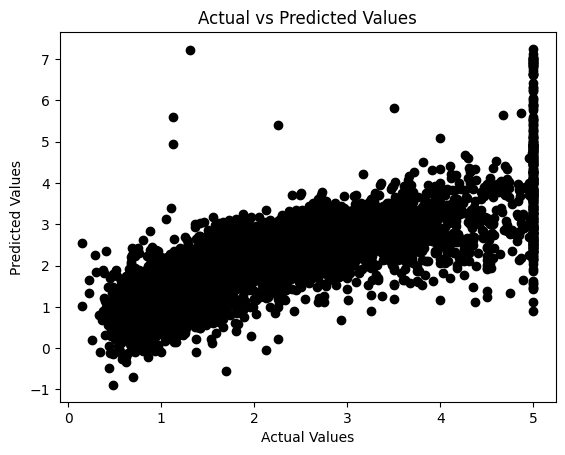

In [ ]:
plt.scatter(y_test, y_pred, color ='black') #"plt.scatter(x, y, color='black')" untuk Membuat grafik scatter plot (diagram sebar). "y_test (sumbu X)", Nilai asli (harga rumah yang sebenarnya). "y_pred (sumbu Y)", Nilai prediksi dari model Regresi Linear.
plt.xlabel('Actual Values') #Memberi label sumbu X sebagai "Actual Values" (nilai asli)
plt.ylabel('Predicted Values') #Memberi label sumbu Y sebagai "Predicted Values" (nilai prediksi).
plt.title('Actual vs Predicted Values') # Memberi judul grafik.
plt.show() #Menampilkan scatter plot